<a href="https://colab.research.google.com/github/Lourdvic/AugmentedPlans/blob/master/floor_plan_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


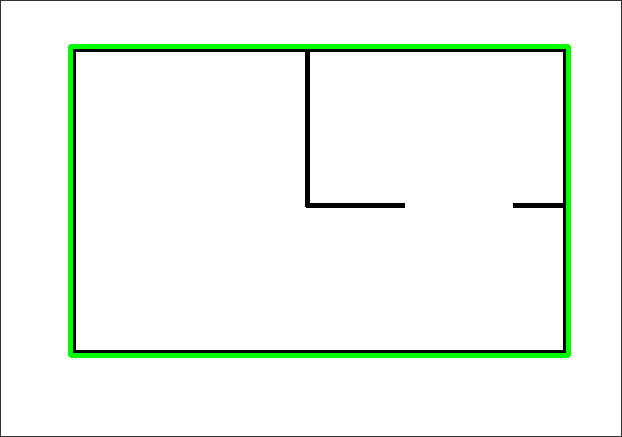

In [37]:
import cv2
import numpy as np  
from google.colab.patches import cv2_imshow

#load image and convert to hsv
img = cv2.imread("/content/drive/MyDrive/IT projects/AP Converter/plan-simple.png")

# draw gray box around image to detect edge buildings
h,w = img.shape[:2]
cv2.rectangle(img,(0,0),(w-1,h-1), (50,50,50),1)

# convert image to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define color ranges
low_yellow = (0,28,0)
high_yellow = (27,255,255)

low_gray = (0,0,0)
high_gray = (179,255,233)

# create masks
yellow_mask = cv2.inRange(hsv, low_yellow, high_yellow )
gray_mask = cv2.inRange(hsv, low_gray, high_gray)

# combine masks
combined_mask = cv2.bitwise_or(yellow_mask, gray_mask)
kernel = np.ones((3,3), dtype=np.uint8)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_DILATE,kernel)

# findcontours
contours, hier = cv2.findContours(combined_mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# find and draw buildings
#for x in range(len(contours)):
 #       # if a contour has not contours inside of it, draw the shape filled
  #      c = hier[0][x][2]
   #     if c == -1:
    #            cv2.drawContours(img,[contours[x]],0,(0,0,255),-1)

# draw the outline of all contours
#for cnt in contours:
 #       cv2.drawContours(img,[cnt],0,(0,255,0),2)

img = cv2.drawContours(img, contours, 2, (0,255,0), 3)

# display result
cv2_imshow(img)


In [6]:
contours[2][1]

array([[ 70, 355]], dtype=int32)

In [7]:
contours[2][1, 0]

array([ 70, 355], dtype=int32)



```
# Ce texte est au format code
```



In [8]:
contours[2]

array([[[ 70,  46]],

       [[ 70, 355]],

       [[568, 355]],

       [[568,  46]]], dtype=int32)

In [ ]:
contours[3][3, 0][1]

53

In [9]:
len(contours[3])

24

In [42]:

i = 0
for i in range(len(contours[2])):
  #print(i)
  #print("x", i, " = ", contours[3][i, 0][0])
  #print("y", i, " = ", contours[3][i, 0][1])
  x1 = contours[2][i, 0][0]
  y1 = contours[2][i, 0][1]
  #print("x1 = ", contours[2][i, 0][0])
  #print("y1 = ", contours[2][i, 0][1])

  if i == len(contours[2]) - 1:
    x2 = contours[2][0, 0][0]
    y2 = contours[2][0, 0][1]
    
    originX = round(x1 / 40 * 100 * 10)
    originY = round(y1 / 40 * 100 * 10)
    sizeX = round(x2 / 40 * 100 * 10) + round(x1 / 40 * 100 * 10)
    sizeY = round(y2 / 40 * 100 * 10) + round(y1 / 40 * 100 * 10)
    if sizeX < 0:
      originX += sizeX
      sizeX = abs(sizeX)
    if sizeY < 0:
      originY += sizeY
      sizeY = abs(sizeY)


#    print("originX= ", originX)
#    print("originY= ", originY)
#    print("sizeX= ", sizeX)
#    print("sizeY= ", sizeY)

  else:
    x2 = contours[2][i + 1 , 0][0]
    y2 = contours[2][i + 1, 0][1]
  #print("x2 = ", contours[2][i + 1, 0][0])
  #print("y2 = ", contours[2][i + 1, 0][1])

  originX = round(x1 / 40 * 100 * 10)
  originY = round(y1 / 40 * 100 * 10)

  sizeX = round(x2 / 40 * 100 * 10) - round(x1 / 40 * 100 * 10)
  sizeY = round(y2 / 40 * 100 * 10) - round(y1 / 40 * 100 * 10)
  if sizeX < 0:
    originX += sizeX
    sizeX = abs(sizeX)
  if sizeY < 0:
    originY += sizeY
    sizeY = abs(sizeY)
  #print("sX = ", sizeX)
  #print("sY = ", sizeY)
  print("originX = ", originX)
  print("originY = ", originY)
  print("sizeX = ", sizeX)
  print("sizeY = ", sizeY)
  print("\n")
  
  #write AP FILE
  apfile = []

  # ID type and group id of the object 
  apfile.append('W00000001')

  # origin X
  if originX == 0:
    apfile.append('000000000')
  elif originX <= 9 and originX > 0:
    apfile.append('00000000' + str(originX))
  elif originX >= 10 and originX <= 99:
    apfile.append('0000000' + str(originX))
  elif originX >= 100 and originX <= 999:
    apfile.append('000000' + str(originX))
  elif originX >= 1000 and originX <= 9999:
    apfile.append('00000' + str(originX))
  elif originX >= 10000 and originX <= 99999:
    apfile.append('0000' + str(originX))

  # origin Y
  if originY == 0:
    apfile.append('000000000')
  elif originY <= 9 and originY > 0:
    apfile.append('00000000' + str(originY))
  elif originY >= 10 and originY <= 99:
    apfile.append('0000000' + str(originY))
  elif originY >= 100 and originY <= 999:
    apfile.append('000000' + str(originY))
  elif originY >= 1000 and originY <= 9999:
    apfile.append('00000' + str(originY))
  elif originY >= 10000 and originY <= 99999:
    apfile.append('0000' + str(originY))

  # origin z
  apfile.append('000000000')
        
  # angle X, Y, Z
  apfile.append('000000000')
  apfile.append('000000000')
  apfile.append('000000000')

  # size X
  if sizeX == 0:
    apfile.append('000000000')
  elif sizeX <= 9 and sizeX > 0:
      apfile.append('00000000' + str(sizeX))
  elif sizeX >= 10 and sizeX <= 99:
    apfile.append('0000000' + str(sizeX))
  elif sizeX >= 100 and sizeX <= 999:
    apfile.append('000000' + str(sizeX))
  elif sizeX >= 1000 and sizeX <= 9999:
    apfile.append('00000' + str(sizeX))
  elif sizeX >= 10000 and sizeX <= 99999:
    apfile.append('0000' + str(sizeX))

  # sizeY 
  if sizeY == 0:
    apfile.append('000000000')
  elif sizeY <= 9 and sizeY > 0:
    apfile.append('00000000' + str(sizeY))
  elif sizeY >= 10 and sizeY <= 99:
    apfile.append('0000000' + str(sizeY))
  elif sizeY >= 100 and sizeY <= 999:
    apfile.append('000000' + str(sizeY))
  elif sizeY >= 1000 and sizeY <= 9999:
    apfile.append('00000' + str(sizeY))
  elif sizeY >= 10000 and sizeY <= 99999:
    apfile.append('0000' + str(sizeY))
  
  # size Z
  apfile.append('000000000')

  # pipe
  apfile.append('000000000')

  # convert the apfile list to a str
  apstring = ''.join(apfile)
  # write & save apfile on file 
  with open('/content/drive/MyDrive/IT projects/AP Converter/NEWAP/NEWAPfile6.txt', 'a') as handle:
    handle.write(apstring)

originX =  1750
originY =  1150
sizeX =  0
sizeY =  7725


originX =  1750
originY =  8875
sizeX =  12450
sizeY =  0


originX =  14200
originY =  1150
sizeX =  0
sizeY =  7725


originX =  1750
originY =  1150
sizeX =  12450
sizeY =  0




In [4]:
len(contours[2]) - 1

3

In [ ]:

for i in range(len(contours[3])):
  #print("x", i, " = ", contours[3][i, 0][0])
  #print("y", i, " = ", contours[3][i, 0][1])
  xi = contours[3][i + 1, 0][0]
  yi = contours[3][i + 1, 0][1]

IndexError: ignored

In [ ]:
import math

x0, y0 = 70, 46
x1, y1 = 70, 355
x2, y2 = 568, 355
x3, y3 = 568, 46

print(x0,y0,x1,y1)
distance = math.sqrt(((x0 - x1)**2)+((y0 - y1)**2))
distance2 = math.sqrt(((x1 - x2)**2)+((y1 - y2)**2))


70 46 70 355


distance

In [ ]:
#real dimension in cm 
# we first put the pxl distance in cm 
# then we put it at the floor plan scale here 100
# then we convert in mm

reeldim = round(((distance / 40) * 100) * 10)
reeldim

7725

In [ ]:
cm = distance / 40 

In [ ]:
scale = cm * 100

In [ ]:
mm = scale * 10

In [ ]:
# coord in milimeters
x0mm = round(x0 / 40 * 100 * 10)
y0mm = round(y0 / 40 * 100 * 10)
x1mm = round(x1 / 40 * 100 * 10)
y1mm = round(y1 / 40 * 100 * 10)
x2mm = round(x2 / 40 * 100 * 10)
y2mm = round(y2 / 40 * 100 * 10)
x3mm = round(x3 / 40 * 100 * 10)
y3mm = round(y3 / 40 * 100 * 10)